In [94]:
f = open("data/smallBinaryMatroids/hr-sz07-rk03", "r")

In [95]:
repstring = next(f); repstring

'7 1 2 3 4 5 6 7 \n'

In [92]:
f = open("data/smallBinaryMatroids/hr-sz07-rk03", "r")

In [5]:
import json

In [96]:
def string_to_matrix(repstring, rank):
    """
    INPUT: string as from Gordon Royle's binary matroid data
    OUTPUT: binary matrix
    """
    elts = repstring.strip().split(" ")[1:]
    mat = []
    for n in elts:
        # Todo: adjust according to rank
        mat.append([int(c) for c in format(int(n), '0' + str(rank) + 'b')])
        # alternate solution: bin(int(n))[2:].zfill(7)
    return Matrix(GF(2), mat).transpose()  

In [98]:
m = string_to_matrix(repstring, 3); m

[0 0 0 1 1 1 1]
[0 1 1 0 0 1 1]
[1 0 1 0 1 0 1]

In [100]:
M = Matroid(m); M

Binary matroid of rank 3 on 7 elements, type (3, 0)

In [25]:
def matrix_to_matroid(mat):
    return Matroid(mat)

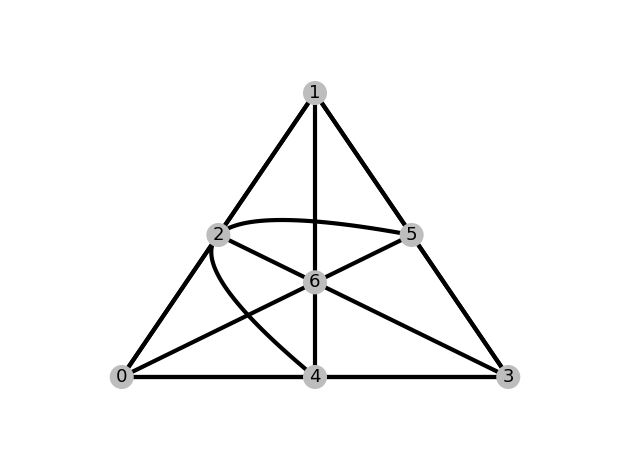

In [101]:
M.plot()

In [102]:
M.dual()

Binary matroid of rank 4 on 7 elements, type (3, 7)

In [28]:
'''parameters:
graphic (check fano, K5, K33, and duals)
triangle-free
is simple
is cosimple
is connected
is 3-connected
is 4-connected
girth
cogirth

Make data [rep string, those 14 parameters]
'''

'parameters:\ngraphic (check fano, K5, K33, and duals)\ntriangle-free\nis simple\nis cosimple\nis connected\nis 3-connected\nis 4-connected\ngirth\ncogirth\n\nMake data [rep string, those 14 parameters]\n'

In [31]:
# these are stubs
# improve speed and add checks for matroids with rank or corank 0
def girth(M):
    return min(len(C) for C in M.circuits())

def cogirth(M):
    return min(len(C) for C in M.cocircuits())

In [58]:
def analyze_matroid(M):
    attribs = [False] * 12 # 12 boolean variables
    attribs.extend([0, 0]) # girth and cogirth
    
    # checking for minors can be improved with a database approach
    attribs[0] = M.has_minor(matroids.named_matroids.Fano())
    attribs[1] = M.has_minor(matroids.named_matroids.Fano().dual())
    attribs[2] = M.has_minor(Matroid(graphs.CompleteBipartiteGraph(3,3)))
    attribs[3] = M.has_minor(matroids.named_matroids.K33dual())
    attribs[4] = M.has_minor(matroids.CompleteGraphic(5))
    attribs[5] = M.has_minor(matroids.CompleteGraphic(5).dual())
    
    attribs[6] = M.has_line_minor(3)
    attribs[7] = M.is_simple()
    attribs[8] = M.is_cosimple()
    attribs[9] = M.is_connected()
    attribs[10] = M.is_3connected()
    attribs[11] = M.is_4connected()
    
    attribs[12] = girth(M)
    attribs[13] = cogirth(M)
    
    return attribs

In [59]:
analyze_matroid(M)

[False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 3,
 1]

In [67]:
def main():
    InFile = "data/smallBinaryMatroids/hr-sz13-rk08"
    OutFile = "hr-sz13-rk08-results.json"
    rank = 8
    
    result = []
    
    with open(InFile, 'r') as f:
        for repstring in f:
            mat = string_to_matrix(repstring, rank)
            M = matrix_to_matroid(mat)
            attribs = analyze_matroid(M)
            result.append([repstring] + [str(a) for a in attribs])
    
    with open(OutFile, 'w') as f:
        f.write(json.dumps(result))

In [83]:
main()

In [86]:
with open('hr-sz13-rk08-results.json', 'r') as f:
    data = json.load(f)

In [87]:
len(data)

5098

In [90]:
data[3000]

['13 1 2 4 7 8 12 16 31 32 35 64 128 207 \n',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'True',
 'False',
 'True',
 'False',
 'False',
 '3',
 '2']

In [57]:
string_to_matrix(data[0][0])

[0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 1 1 1 1 0 0 0 0]
[0 1 1 0 0 1 1 0 0 0 0]
[1 0 1 0 1 0 1 0 0 0 0]